Student finishes the exam 0 at time 3 in Hall 0
Student finishes the exam 1 at time 3.5 in Hall 1
Student finishes the exam 3 at time 5.5 in Hall 0
Student finishes the exam 4 at time 6.0 in Hall 1
Student finishes the exam 6 at time 6.0 in Hall 0
Student finishes the exam 5 at time 6.5 in Hall 2
Student finishes the exam 7 at time 6.5 in Hall 1
Student finishes the exam 2 at time 7.0 in Hall 2
Student finishes the exam 8 at time 7.0 in Hall 2
Student finishes the exam 9 at time 11.5 in Hall 0


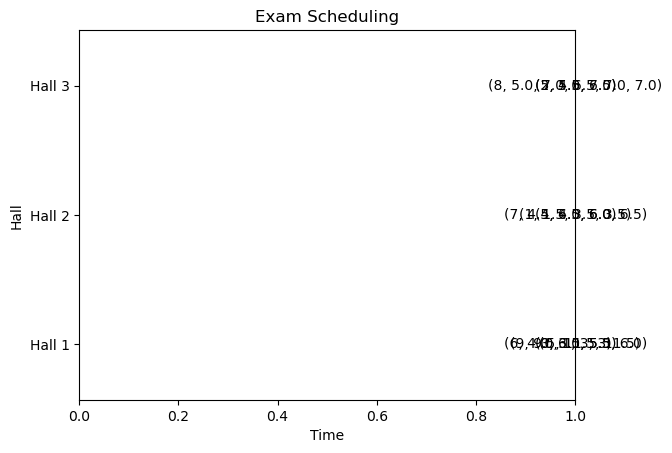

In [1]:
import simpy
import random
import matplotlib.pyplot as plt

# Constants Github
NUM_EXAMS = 10  # Number of exams to schedule
NUM_HALLS = 3   # Number of available exam halls
EXAM_DURATION = 2  # Duration of each exam in hours

class ExamHall:
    def __init__(self, env, hall_id):
        self.env = env
        self.hall_id = hall_id
        self.exam_count = 0

    def conduct_exam(self, exam):
        yield self.env.timeout(EXAM_DURATION)
        print(f'Student finishes the exam {exam} at time {self.env.now} in Hall {self.hall_id}')
        self.exam_count += 1

def student(env, exam, hall, exam_schedule):
    # Student arrives for an exam
    yield env.timeout(random.randint(1, 5))
    start_time = env.now
    exam_schedule[hall.hall_id].append((exam, start_time, start_time + EXAM_DURATION))
    yield env.process(hall.conduct_exam(exam))
    exam_schedule[hall.hall_id][-1] += (env.now,)  # Update finish time

def exam_scheduler(env, halls, exam_schedule):
    for i in range(NUM_EXAMS):
        hall = halls[i % NUM_HALLS]
        env.process(student(env, i, hall, exam_schedule))
        yield env.timeout(0.5)  # Time gap between students

# Create environment and exam halls
env = simpy.Environment()
exam_halls = [ExamHall(env, i) for i in range(NUM_HALLS)]

#Lilly

# Initialize exam schedule
exam_schedule = [[] for _ in range(NUM_HALLS)]

# Run the simulation
env.process(exam_scheduler(env, exam_halls, exam_schedule))
env.run()

# Visualization
fig, ax = plt.subplots()

# Set y-axis ticks and labels for exam halls
ax.set_yticks(range(NUM_HALLS))
ax.set_yticklabels([f'Hall {i+1}' for i in range(NUM_HALLS)])

# Set x-axis range
ax.set_xlim(0, 1)  # Adjust the x-axis range as needed

# Plot exams as horizontal bars
for i, hall_schedule in enumerate(exam_schedule):
    for exam in hall_schedule:
        ax.barh(i, 1, left=1, height=0.6, align='center', alpha=0.6)
        ax.text(1, i, str(exam), ha='center', va='center')

# Set labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Hall')
ax.set_title('Exam Scheduling')

plt.show()

In [2]:
import simpy
import random
import matplotlib.pyplot as plt

# Constants
NUM_EXAMS = 10  # Number of exams to schedule
NUM_HALLS = 3   # Number of available exam halls
EXAM_DURATION = 2  # Duration of each exam in hours
NUM_STUDENTS_PER_EXAM = 5  # Number of students attending each exam

class ExamHall:
    def _init_(self, env, hall_id):
        self.env = env
        self.hall_id = hall_id
        self.exam_count = 0

    def conduct_exam(self, exam):
        yield self.env.timeout(EXAM_DURATION)
        print(f'Student finishes the exam {exam} at time {self.env.now} in Hall {self.hall_id}')
        self.exam_count += 1

def student(env, exam, hall, exam_schedule):
    for student_id in range(NUM_STUDENTS_PER_EXAM):
        # Student arrives for an exam
        yield env.timeout(random.randint(1, 5))
        start_time = env.now
        exam_schedule[hall.hall_id].append((exam, student_id, start_time, start_time + EXAM_DURATION))
        yield env.process(hall.conduct_exam(exam))
        exam_schedule[hall.hall_id][-1] += (env.now,)  # Update finish time

def exam_scheduler(env, halls, exam_schedule):
    for i in range(NUM_EXAMS):
        hall = halls[i % NUM_HALLS]
        env.process(student(env, i, hall, exam_schedule))
        yield env.timeout(0.5)  # Time gap between exams

# Create environment and exam halls
env = simpy.Environment()
exam_halls = [ExamHall(env, i) for i in range(NUM_HALLS)]

# Initialize exam schedule
exam_schedule = [[] for _ in range(NUM_HALLS)]

# Run the simulation
env.process(exam_scheduler(env, exam_halls, exam_schedule))
env.run()

# Visualization
fig, ax = plt.subplots()

# Set y-axis ticks and labels for exam halls
ax.set_yticks(range(NUM_HALLS))
ax.set_yticklabels([f'Hall {i+1}' for i in range(NUM_HALLS)])

# Set x-axis range
ax.set_xlim(0, 1)  # Adjust the x-axis range as needed

# Plot exams as horizontal bars
for i, hall_schedule in enumerate(exam_schedule):
    for exam in hall_schedule:
        ax.barh(i, 1, left=1, height=0.6, align='center', alpha=0.6)
        ax.text(1, i, str(exam), ha='center', va='center')

# Set labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Hall')
ax.set_title('Exam Scheduling')

plt.show()

TypeError: ExamHall() takes no arguments

In [3]:
import simpy
from collections import defaultdict
import random

def parse_data(file_path):
    data = defaultdict(dict)
    with open(file_path, 'r') as file:
        section = None
        for line in file:
            line = line.strip()
            if line == 'COURSES:':
                section = 'COURSES'
                continue
            elif line == 'ROOMS:':
                section = 'ROOMS'
                continue
            elif line == 'CURRICULA:':
                section = 'CURRICULA'
                continue
            elif line == 'UNAVAILABILITY_CONSTRAINTS:':
                section = 'UNAVAILABILITY_CONSTRAINTS'
                continue
            elif line == 'END.':
                break

            if section == 'COURSES':
                parts = line.split()
                if len(parts) >= 5:
                    course_id = parts[0]
                    data['COURSES'][course_id] = {
                        'teacher': parts[1],
                        'duration': int(parts[2]),
                        'nr_students': int(parts[3]),
                        'min_working_days': int(parts[4])
                    }
            elif section == 'ROOMS':
                parts = line.split()
                if len(parts) >= 2:
                    room_id = parts[0]
                    capacity = int(parts[1])
                    data['ROOMS'][room_id] = capacity
            elif section == 'CURRICULA':
                parts = line.split()
                if len(parts) >= 3:
                    curriculum_id = parts[0]
                    courses = parts[2:]
                    data['CURRICULA'][curriculum_id] = courses
            elif section == 'UNAVAILABILITY_CONSTRAINTS':
                parts = line.split()
                if len(parts) >= 3:
                    course_id = parts[0]
                    day = int(parts[1])
                    period = int(parts[2])
                    data['UNAVAILABILITY_CONSTRAINTS'][(course_id, day, period)] = True
    return data


def schedule_exams(env, data):
    courses = data['COURSES']
    rooms = data['ROOMS']
    curricula = data['CURRICULA']
    constraints = data['UNAVAILABILITY_CONSTRAINTS']

    # Shuffle the order of courses to randomize the scheduling
    course_ids = list(courses.keys())
    random.shuffle(course_ids)

    # Create a dictionary to track the scheduled exams
    scheduled_exams = {}

    # Define the exam scheduling process
    def schedule_exam(course_id, duration):
        nonlocal scheduled_exams

        # Check if there are any available rooms
        if len(rooms) == 0:
            print("No available rooms.")
            return

        # Check if there are any available slots
        if len(env.slots) == 0:
            print("No available exam slots.")
            return

        # Randomly select a room
        room_id = random.choice(list(rooms.keys()))
        room_capacity = rooms[room_id]

        # Randomly select an exam slot
        exam_slot = random.choice(env.slots)

        # Assign the exam slot to the course
        scheduled_exams[course_id] = {
            'room': room_id,
            'day': exam_slot[0],
            'period': exam_slot[1]
        }

        # Update the room capacity
        rooms[room_id] -= room_capacity

        # Remove the assigned room and exam slot
        del rooms[room_id]
        env.slots.remove(exam_slot)

        # Print the scheduled exam
        print(f"Scheduled exam: {course_id} | Room: {room_id} | Day: {exam_slot[0]} | Period: {exam_slot[1]}")

        # Wait for the duration of the exam
        yield env.timeout(duration)

        # Free up the room and exam slot after the exam
        rooms[room_id] = room_capacity
        env.slots.append(exam_slot)

    # Create the simulation environment
    env = simpy.Environment()

    # Initialize the available exam slots
    env.slots = [(day, period) for day in range(5) for period in range(6)]

    # Start the exam scheduling process for each course
    for course_id in course_ids:
        course = courses[course_id]
        env.process(schedule_exam(course_id, course['duration']))

    # Run the simulation
    env.run()

    return scheduled_exams

# Parse the data from the file
data = parse_data('data.ctt')

# Generate the exam schedule using SimPy
scheduled_exams = schedule_exams(simpy.Environment(), data)

# Display the exam schedule
print("\nExam Schedule:")
print("--------------")
for course_id, exam_info in scheduled_exams.items():
    room = exam_info['room']
    day = exam_info['day']
    period = exam_info['period']
    print(f"{course_id} | Room: {room} | Day: {day} | Period: {period}")

Scheduled exam: c0062 | Room: F | Day: 2 | Period: 1
Scheduled exam: c0030 | Room: B | Day: 3 | Period: 4
Scheduled exam: c0033 | Room: G | Day: 0 | Period: 5
Scheduled exam: c0014 | Room: E | Day: 2 | Period: 0
Scheduled exam: c0004 | Room: S | Day: 2 | Period: 3
Scheduled exam: c0069 | Room: C | Day: 4 | Period: 5
No available rooms.
No available rooms.
No available rooms.
No available rooms.
No available rooms.
No available rooms.
No available rooms.
No available rooms.
No available rooms.
No available rooms.
No available rooms.
No available rooms.
No available rooms.
No available rooms.
No available rooms.
No available rooms.
No available rooms.
No available rooms.
No available rooms.
No available rooms.
No available rooms.
No available rooms.
No available rooms.
No available rooms.

Exam Schedule:
--------------
c0062 | Room: F | Day: 2 | Period: 1
c0030 | Room: B | Day: 3 | Period: 4
c0033 | Room: G | Day: 0 | Period: 5
c0014 | Room: E | Day: 2 | Period: 0
c0004 | Room: S | Day: 

In [4]:
import matplotlib.pyplot as plt

In [8]:
def plot_exam_schedule(scheduled_exams, rooms):
    days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
    periods = ['Period 1', 'Period 2', 'Period 3', 'Period 4', 'Period 5', 'Period 6']

    # Create a 2D grid for plotting the schedule
    grid = [[0 for _ in range(len(periods))] for _ in range(len(days))]

    # Populate the grid with scheduled exams
    for course_id, exam_info in scheduled_exams.items():
        room = exam_info['room']
        day = exam_info['day']
        period = exam_info['period']
        grid[day][period] = 1

    # Plot the schedule
    fig, ax = plt.subplots()
    ax.imshow(grid, cmap='Blues')

    # Set tick labels for the x-axis (periods)
    ax.set_xticks(range(len(periods)))
    ax.set_xticklabels(periods)

    # Set tick labels for the y-axis (days)
    ax.set_yticks(range(len(days)))
    ax.set_yticklabels(days)

    # Add labels for each exam in the grid
    for i in range(len(days)):
        for j in range(len(periods)):
            if grid[i][j] == 1:
                ax.text(j, i, 'X', ha='center', va='center', color='white')

    # Set labels and title
    ax.set_xlabel('Periods')
    ax.set_ylabel('Days')
    ax.set_title('Exam Schedule')

    # Show the plot
    plt.show()

Scheduled exam: c0002 | Room: B | Day: 0 | Period: 5
Scheduled exam: c0032 | Room: G | Day: 2 | Period: 0
Scheduled exam: c0014 | Room: E | Day: 2 | Period: 3
Scheduled exam: c0031 | Room: F | Day: 4 | Period: 5
Scheduled exam: c0066 | Room: S | Day: 4 | Period: 1
Scheduled exam: c0067 | Room: C | Day: 2 | Period: 1
No available rooms.
No available rooms.
No available rooms.
No available rooms.
No available rooms.
No available rooms.
No available rooms.
No available rooms.
No available rooms.
No available rooms.
No available rooms.
No available rooms.
No available rooms.
No available rooms.
No available rooms.
No available rooms.
No available rooms.
No available rooms.
No available rooms.
No available rooms.
No available rooms.
No available rooms.
No available rooms.
No available rooms.

Exam Schedule:
--------------
c0002 | Room: B | Day: 0 | Period: 5
c0032 | Room: G | Day: 2 | Period: 0
c0014 | Room: E | Day: 2 | Period: 3
c0031 | Room: F | Day: 4 | Period: 5
c0066 | Room: S | Day: 

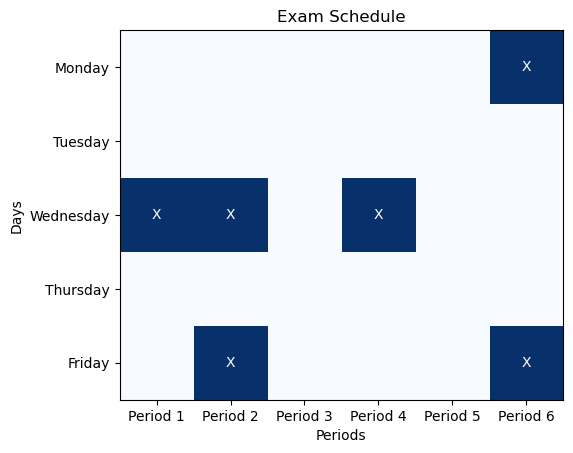

In [9]:
# Generate the exam schedule using SimPy
scheduled_exams = schedule_exams(simpy.Environment(), data)

# Display the exam schedule
print("\nExam Schedule:")
print("--------------")
for course_id, exam_info in scheduled_exams.items():
    room = exam_info['room']
    day = exam_info['day']
    period = exam_info['period']
    print(f"{course_id} | Room: {room} | Day: {day} | Period: {period}")

# Plot the exam schedule
plot_exam_schedule(scheduled_exams, data['ROOMS'])
